In [1]:
import astropy
import matplotlib
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits')
file[0].header

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

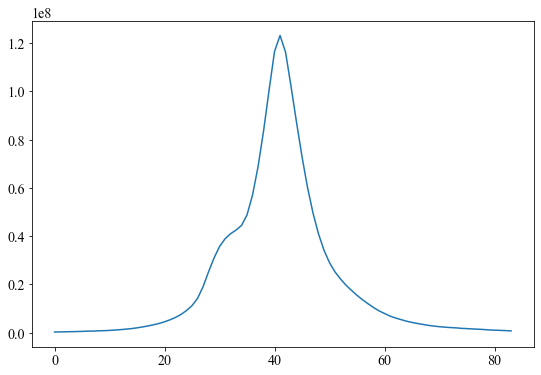

In [10]:
# plot of brightness intensity vs velocity
file[0].data[file[0].data == -32786] = np.nan
sum_data = np.nansum(np.nansum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data) 

In [1]:
def v_indx(v_val): # v_val must be in m/s
    return int((v_val - 3.99321598442 * 10 ** 4) / (-9.77198303456 * 10 ** 2))

In [7]:
# gets channel maps

def chan_map(v_indx, v, vmin = 0, vmax = 20):
    wcs = WCS(file[0].header) # assigning world coordinate system (for the grid lines) 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_indx))
    im = plt.imshow(file[0].data[v_indx,:,:], cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar(im)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    ax.set_title('Velocity = ' + str(v) + ' km/s', fontsize = 22)

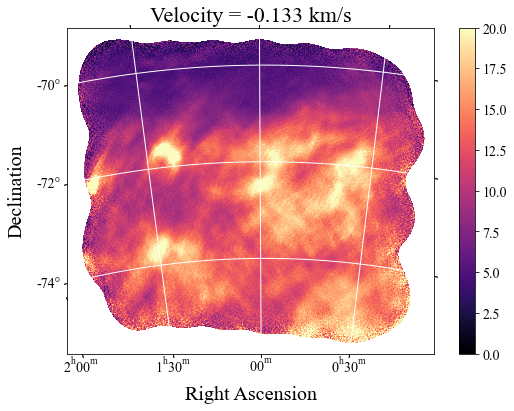

In [8]:
chan_map(v_indx(-0.133 * 10 ** 3), -0.133)

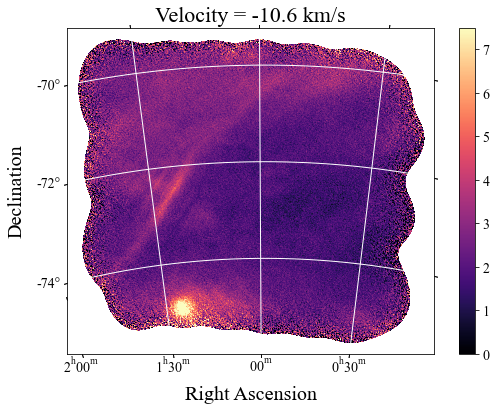

In [14]:
chan_map(v_indx(-10.6 * 10 ** 3), -10.6, vmax = 7.5)

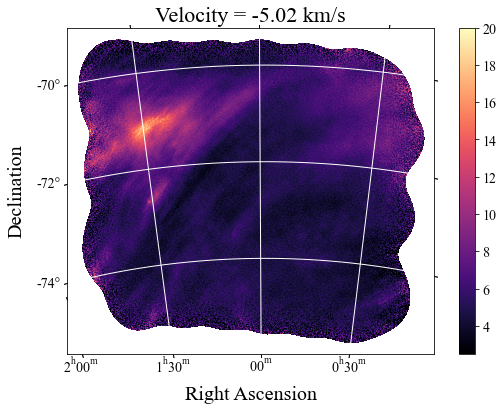

In [16]:
chan_map(v_indx(-5.02 * 10 ** 3), -5.02, vmin = 2.5)